# Super Resolution

This code is the main interface to try out implementation of the super resolution.

In [1]:
from train import sr_train

# Set the parameters
name = "sr_x4_pF_e8_b32"
scaling_factor = 4
use_pixel_loss = False
num_epochs = 8
batch_size = 32

# Train the super resolution model
sr_train(name, scaling_factor,
         use_pixel_loss=use_pixel_loss,
         num_epochs=num_epochs,
         batch_size=batch_size)

Using mps.
Skipping file ".DS_Store".
Epoch 1/8
7.73s - loss: 3.2136
Epoch 2/8
7.94s - loss: 8.9666
Epoch 3/8
7.59s - loss: 4.2477
Epoch 4/8
7.86s - loss: 3.2606
Epoch 5/8
7.79s - loss: 3.3086
Epoch 6/8
7.58s - loss: 2.9308
Epoch 7/8
7.40s - loss: 3.8875
Epoch 8/8
7.46s - loss: 2.6367
Super resolution model "sr_x4_pF_e8_b32" saved".


In [1]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms


def display_images(image1, image2):
    """Display a pair of images side to side."""

    # Get the size of the two images
    width1, height1 = image1.size
    width2, height2 = image2.size

    # Find the maximum size
    width = max(width1, width2)
    height = max(height1, height2)

    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    # Display the first image in the first subplot
    axs[0].imshow(image1)
    axs[0].axis('off')

    # Display the second image in the second subplot
    axs[1].imshow(image2)
    axs[1].axis('off')

    # Show the figure
    plt.show()

Using mps.


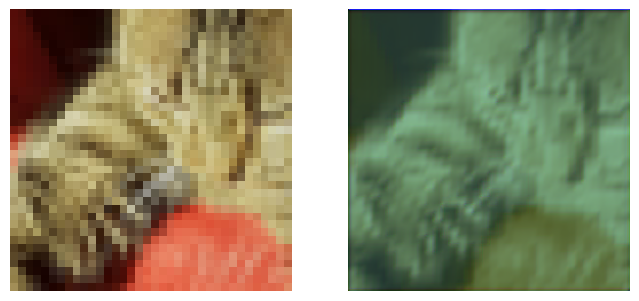

In [2]:
from test import sr_test

import numpy as np

# Set the parameters
name = "sr_x8_pF_e32_b32"
scaling_factor = 8
input = "data/IMG-20210103-WA0000.jpg"

# Test the super resolution model
lr_img, gen_img = sr_test(name, scaling_factor, input)
assert (np.array(gen_img.size) == scaling_factor * np.array(lr_img.size)).all()
display_images(lr_img, gen_img)

###
### Model: sr_x4_pT_e8_b32
###


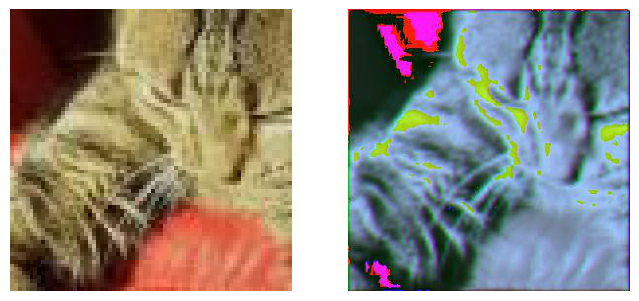

###
### Model: sr_x8_pF_e8_b32
###


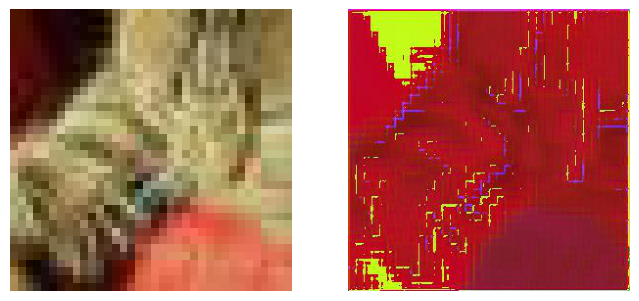

###
### Model: sr_x4_pF_e8_b32
###


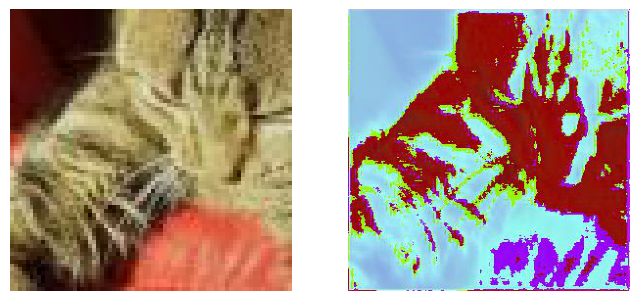

###
### Model: sr_x8_pF_e32_b32
###


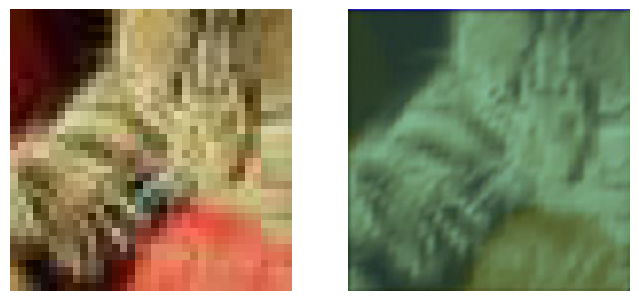

###
### Model: sr_x8_pT_e8_b32
###


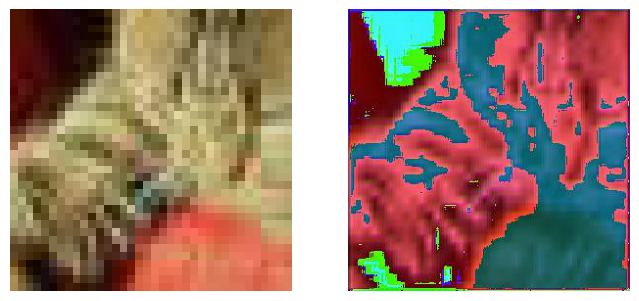

###
### Model: sr_x4_pT_e32_b32
###


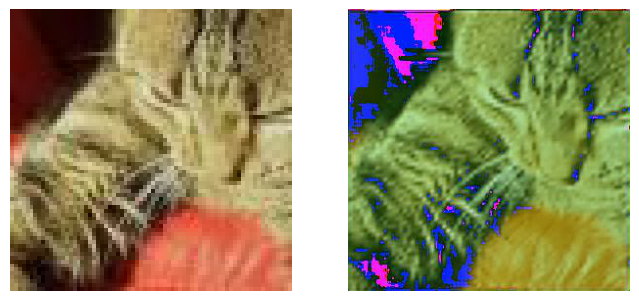

###
### Model: sr_x4_pF_e1_b32
###


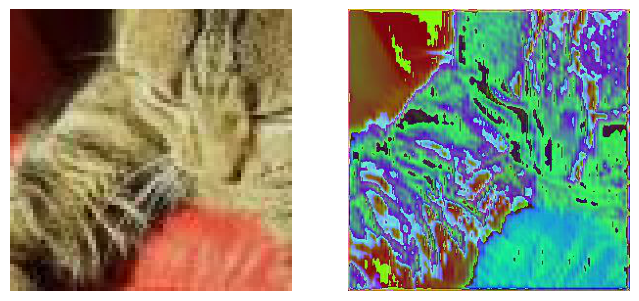

###
### Model: sr_x8_pT_e1_b32
###


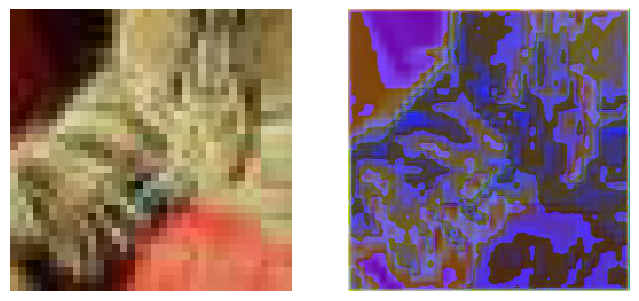

###
### Model: sr_x4_pT_e1_b32
###


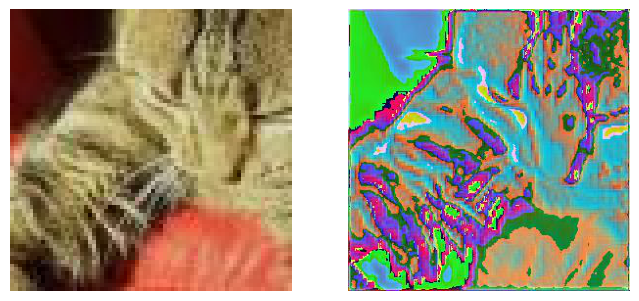

###
### Model: sr_x8_pF_e1_b32
###


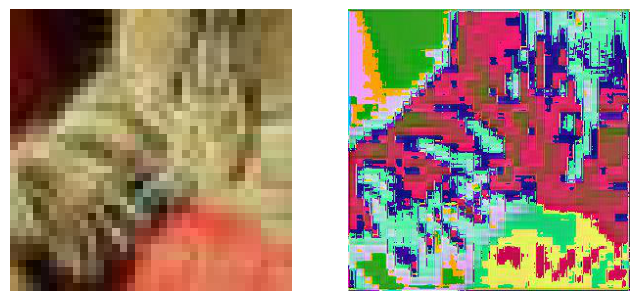

###
### Model: sr_x8_pT_e32_b32
###


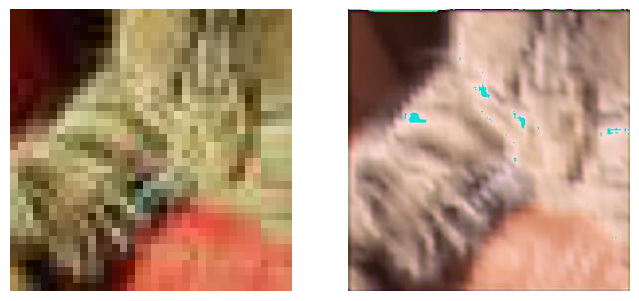

###
### Model: sr_x4_pF_e32_b32
###


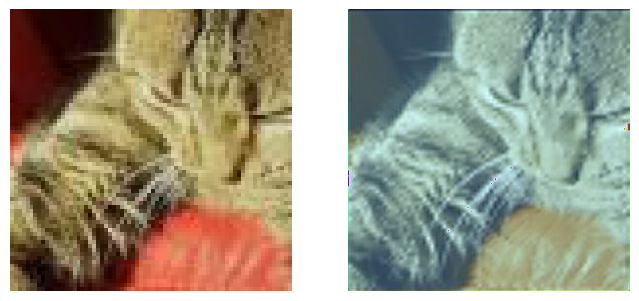

In [3]:
import os

from PIL import Image

output_dir = "output"
for model in os.listdir(output_dir):
    print(f"###")
    print(f"### Model: {model}")
    print(f"###")
    
    input = "IMG-20210103-WA0000"
    path = f"{output_dir}/{model}/{input}"
    display_images(Image.open(f"{path}/lr_img.jpg"), Image.open(f"{path}/gen_img.jpg"))